In [18]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

#Setting date range for data to be plotted
start_date = datetime(2020, 3, 1)
end_date = datetime(2023, 3, 1) #Data stops at 2023-03

dates = []
confirmed_cases = []

current_date = start_date
while current_date <= end_date:
    #Format date as string in YYYY-MM-DD format
    date_str = current_date.strftime('%Y-%m-%d')
    url = f"https://covid-api.com/api/reports/total?date={date_str}&iso=SGP"
    
    response = requests.get(url)
    #Status code 200 indicates a successful request
    if response.status_code == 200:
        json_data = response.json()
        #Checking that data was obtained from the request appropriately
        if "data" in json_data and json_data["data"]:
            confirmed = json_data["data"].get("confirmed", None)
            #Checks if the "confirmed" value is not None - whether there is a valid number of COVID-19 cases
            if confirmed is not None:
                dates.append(current_date)
                confirmed_cases.append(confirmed)
    else:
        print(f"Failed to retrieve data")
    
    current_date += timedelta(weeks=4)



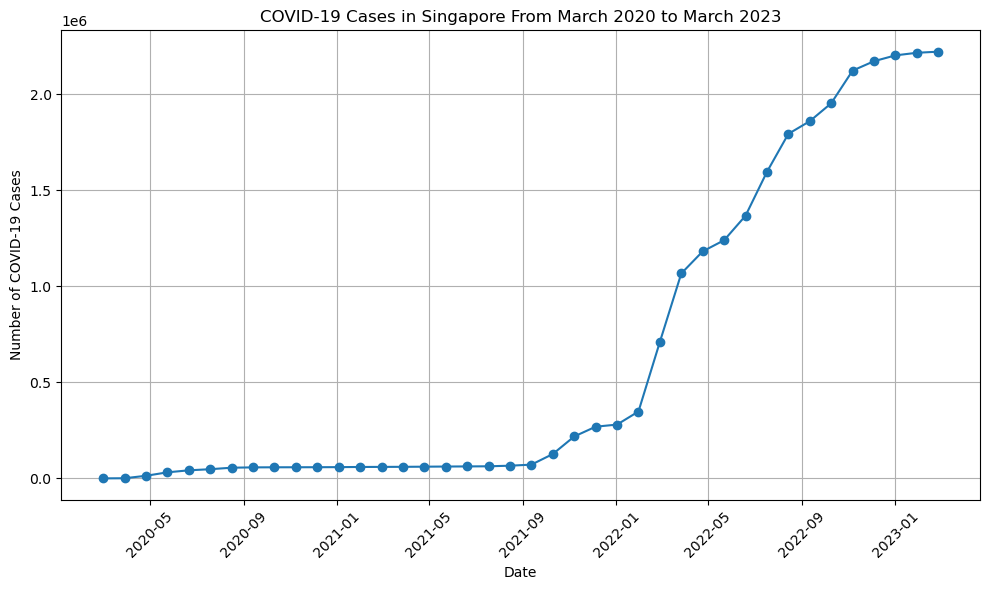

In [19]:
#Create a DataFrame from the collected data
df = pd.DataFrame({'Date': dates, 'Confirmed': confirmed_cases})
df = df.sort_values('Date')

#Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Confirmed'], marker='o', linestyle='-')
plt.title("COVID-19 Cases in Singapore From March 2020 to March 2023")
plt.xlabel("Date")
plt.ylabel("Number of COVID-19 Cases")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()